In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import pandas as pd
%matplotlib inline

In [40]:
A = np.matrix('-3 -2; -1 -3')
B = np.matrix('6;6')
def nc_dynamics(x, t):
    x = x.reshape(2,1)
    _A = np.array([[-6, -2],[-1, -6]]).reshape(2,2)
    xdot = np.array([0,0]).reshape(2,1)
    xdot = np.dot(_A,x) + B
    return xdot.reshape(2,).tolist()[0]
    

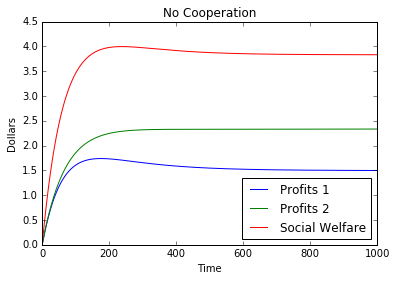

In [42]:
x_0 = [0,0]
t = np.linspace(0.0, 1.0, 1000)

x = odeint( nc_dynamics, x_0 , t )
df = pd.DataFrame(x)
df.columns=["x1","x2"]
df['Profits 1'] = df["x1"]*(-3*df["x1"] + -2*df["x2"] + 6)
df['Profits 2'] = df["x2"]*(-1*df["x1"] + -3*df["x2"] + 6)
df['Social Welfare'] = df["Profits 1"] + df["Profits 2"]
ax1 = df[["Profits 1", "Profits 2", "Social Welfare"]].plot(title="No Cooperation")
ax1.set_ylabel("Dollars")
ax1.set_xlabel("Time")
ax1.set_ylim([0,4.5])
plt.savefig("non_cooperative")

In [45]:
print df[['Profits 1', 'Profits 2', 'Social Welfare']].tail(1)

     Profits 1  Profits 2  Social Welfare
999   1.498151    2.33371        3.831862


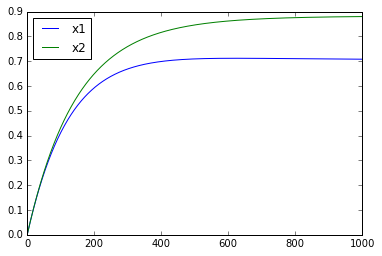

In [43]:
df[['x1', 'x2']].plot()

In [18]:
def pc_dynamics(x,t):
    x = x.reshape(2,1)
    _A = np.array([[-6, -3],[-3, -6]]).reshape(2,2)
    xdot = np.array([0,0]).reshape(2,1)
    xdot = np.dot(_A,x) + B
    return xdot.reshape(2)

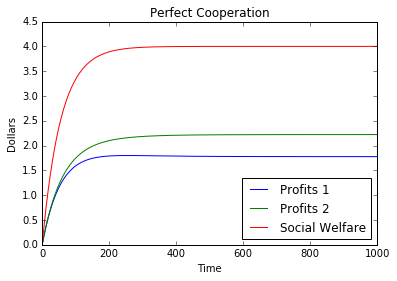

In [19]:
x_0 = np.array([0,0]).reshape(2)
t = np.linspace(0.0, 1.0, 1000)

x = odeint( pc_dynamics, x_0 , t )
dfc = pd.DataFrame(x)
dfc.columns=["x1","x2"]
dfc['Profits 1'] = dfc["x1"]*(A[0][0]*dfc["x1"] + A[0][1]*dfc["x2"] + B[0])
dfc['Profits 2'] = dfc["x2"]*(A[1][0]*dfc["x1"] + A[1][1]*dfc["x2"] + B[1])
dfc['Social Welfare'] = dfc["Profits 1"] + dfc["Profits 2"]
ax2 = dfc[["Profits 1", "Profits 2", "Social Welfare"]].plot(title="Perfect Cooperation")
ax2.set_ylabel("Dollars")
ax2.set_xlabel("Time")
ax2.set_ylim([0,4.5])
plt.savefig("perfect_cooperation")

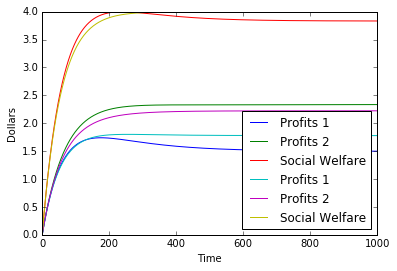

In [8]:
ax1 = df[["Profits 1", "Profits 2", "Social Welfare"]].plot()
dfc[["Profits 1", "Profits 2", "Social Welfare"]].plot(ax=ax1)
ax1.set_ylabel("Dollars")
ax1.set_xlabel("Time")